# Credit Card User Segmentation

### Background
I am a data scientist at a credit card company whose current objective is to reduce costs associated with signup incentives by carefully targeting benefits that will attract new cardholders.

### Tasks:
- Examine 6 months of cardholder data to understand the types of users
- Which benefits are most relevant to each new card offering (user segment)

### Metric
- New cardholder signups
- Downstream, the company makes money off of the interest paid on the balance
- To maximize revenue, encourage behavior that results in large month-to-month balances
    - Bonus: Target those who do not make the full payment every month

### Output
- User segments, each with a target benefit to maximize new cardholder signups
- Any promotions to acquire new cardholders need to be profitable and sustainable
    - I want to target customer segments and discourage those customers who would prove to be less valuable
    - A program that is 'self-selecting' and 'individually correcting'.
    - Does the program align with company capabilities? 
    - Will customers value the program? 
    - Can competitors offer a more desirable alternative? Would partnering make the program more competitive?
    - Should take into account cash value, choice of redemption options, aspirational value, relevance, convenience
    - Motivate customers to consolidate all their spending onto a single card
- Avoid promotions with only short-term benefits
    - Startup bonuses which encourage 'chronic switcher' behavior
    - "Miles" programs that cost the company to acquire a bank of "miles" from other companies (airlines)
    - One-time promotions increase signups but not loyalty once the promotional period is over
    - Lotteries and "chances to win" 

### Customer Segments

**Average user - Target with simplicity and transparency in fees, rates, and terms.**
- Type 1 - Many one-off purchases 
- Type 2 - Multiple purchases per transaction 
- High credit limit
- Multiple minimum payments
- Does not take out cash advances often
- Average purchase value 
- Carries an average daily balance

**Responsible high-volume user - Target with premium network incentives, no foreign transaction fees, low APR.** 
- Mostly one-off and multiple purchases with high value
- Carries a high balance and has a high credit limit
- Responsible for multiple minimum payments but is good at paying them off monthly
- Occasionally takes out cash advances 

**Responsible everyday user - Target with simplicity and transparency in fees, rates, and terms.**
- Makes moderate-to high value purchases with multiple purchases per transaction
- Occasionally takes out cash advances
- Has an average credit limit with few minimum payments
- Carries a relatively low balance but is not always good at paying the full amount each month

**High volume, Financially Stressed user - Target with simplicity and transparency in fees, rates, and terms, rewards for responsible spending.**
- High frequency user that makes high-value purchases frequently, both as single and multiple purchases per transaction
- Maintains a high balance but with many minimum payments
- Average credit limit 
- Does not always pay the full balance 

**Inactive user - Target with low (or no) balance transfer fees. Avoid sign-on bonuses.**
- Carries a high balance with multiple minimum payments 
- Not likely to take out cash advances
- Makes few purchases of any value or type
- Not likely to pay the full balance each month

**Cash advancer - Target with low APR, the same APR for cash advances as purchases, and no fees for cash advances.**
- More likely to make cash advances than purchases
- Carries a very low balance, if any
- Makes small-to-moderate value purchases with multiple purchases per transaction
- Is not likely to pay the balance in full each month

   
### Summary and Actionable Insights
The 6 main customer segments are the average single- and multiple-purchase users, the responsible high-volume user, the struggling high-volume user, the everyday user, the inactive user, and the cash advance user. Based on information from the Harvard Business Review and McKinsey Financial Services, these customer segments align with standard credit card customer segments with well-documented behaviors, including response to incentives.

Average Users are most similar to the established "Self-Aware Avoiders" category of cardholder. They tend to avoid using credit cards, but still carry a moderate-to-high balance and are not likely to pay it off every month. They respond well to simplicity and transparency in fees, rates, and terms. They tend to use credit cards for short-term borrowing and respond well when they see the payoff horizon for major purchases, for example, cards that instantly calculate the scale and duration of monthly payments for a given purchase at the point of sale.

Target the Responsible High-Value user by offering convenience, premium network incentives through partner businesses and services, no foreign transaction fee, and low interest rates. They are willing to pay annual fees if they find the added convenience or status worthwhile.

The High Volume, Finanacially Stressed user is likely either a spendthrift or in a situation that requires credit card borrowing to pay for essentials. They value simplicity and transparency in fees, rates, and terms. McKinsey suggests a new type of reward for this group, rewards for imposing spending limits. This would encourage one-off purchase behavior rather than multiple, higher-value purchases so that they can pay down their debt. 

Target Inactive users carefully. If they carry a high balance without making purchases, they could be a "deal chaser" that moves their balances to take advantage of the best transfer rates for their existing balances without making new purchases. For these, make sure they feel they are getting the best deal. Alternatively, they could be recovering credit and paying down past expenditures, in which case, they are not likely to make purchases or cash advances. Big signup bonuses should be avoided** because they are not likely to spend the bonus using the new card, but low balance transfer rates would be attractive. 

Target the cash advancer with promotions offering no cash advance fees, low APR, the same APR for cash advances as for purchases.




# Dependencies and Defaults

In [2]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import HTML
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.style.use("seaborn-muted")

In [3]:
def get_duplicates (tmp):
    orig_rows = tmp.shape[0]
    orig_cols = tmp.shape[1]
    drop_rows = tmp.drop_duplicates().shape[0]
    drop_cols = tmp.drop_duplicates().shape[1]
    
    print('Original has ' + str(orig_rows) + ' rows and ' + str(orig_cols) + ' columns.')
    if drop_rows == orig_rows:
        print('There are no duplicates in the dataset.')
    else:
        print('There are ' + str(orig_rows - drop_rows) + ' duplicate rows.')


In [4]:
def get_missing (tmp, verbose):
    from IPython.display import HTML
    orig_rows = tmp.shape[0]
    orig_cols = tmp.shape[1]
    drop_rows = tmp.dropna().shape[0]
    drop_cols = tmp.dropna().shape[1]
    
    print('Original has ' + str(orig_rows) + ' rows and ' + str(orig_cols) + ' columns.')
    if drop_rows == orig_rows:
        print('There are no missing values in the dataset.')
    else:
        print('There are ' + str(orig_rows - drop_rows) + ' rows with missing values.')
        for c in tmp.columns.values:
            tmp2 = pd.isnull(tmp[c])
            if (tmp[tmp2].empty == False and verbose == True):
                display(HTML(tmp[tmp2].head().to_html()))
            elif (tmp[tmp2].empty == False and verbose == False):
                print('Number of missing values in col ' + c + ': ', tmp[tmp2].shape[0])

In [5]:
def visualize_data (tmp):
    panels = len(tmp.columns.values)
    cols = 3
    rows = round(panels/cols) 
    if panels % (cols) != 0:
        rows += 1
    fig, ax = plt.subplots(rows, cols, figsize = (rows*4,rows*8))
    i = 0
    j = 0
    for c in tmp.columns.values:
        ax[i][j].hist(tmp[c], label = c, edgecolor = 'dimgray')
        ax[i][j].set_title ('\n' + c + '\n', fontsize = 20)
        ax[i][j].tick_params (labelsize = 18)
        if j == cols-1:
            j = -1
            i += 1
        j += 1
    print ('waiting on plot')
    plt.tight_layout()
    return fig

In [6]:
def elbow (X, min_k, max_k):
    print(X)
    #X = np.array(X).reshape(-1, 1)
    elbow = {}
    for k in np.arange(min_k, max_k):
        model = KMeans (n_clusters = k, max_iter = 1000)
        k_means = model.fit(X)
        elbow[k] = k_means.inertia_

    fig, ax = plt.subplots(1,1, figsize = (8,8))
    ax.plot(list(elbow.keys()), list(elbow.values()), marker = 'o', ms = 10, mec = 'dimgray', lw = 4)
    ax.set_xlabel ('\n K values', fontsize = 20)
    ax.set_ylabel ('Sum of Squares Error\n', fontsize = 20) 
    ax.set_title('\nElbow Method for determining K\n', fontsize = 20)
    ax.tick_params(labelsize = 18)
    plt.show()

In [7]:
def get_kmeans (tmp, label, k):
    
    # Get K-means
    X = np.array(tmp[label]).reshape(-1, 1)
    model = KMeans (n_clusters = k)
    k_means = model.fit (X)
    tmp[label + '_cluster'] = k_means.predict(X)
    tmp[label + '_cluster'].hist()
    return tmp

In [8]:
def cluster_range_numeric (label, tmp):
    cluster_label = label + '_cluster'
    range_label = cluster_label + '_range'
    tmp[range_label] = ''
    
    for i in np.unique(tmp[cluster_label]):
        cluster_range = str(min(tmp[label][tmp[cluster_label] == i])) + '-' + \
            str(max(tmp[label][tmp[cluster_label] == i]))
        tmp[range_label][tmp[cluster_label] == i] = cluster_range
    display(HTML(tmp.head().to_html()))
    return tmp

In [9]:
def visualize_bar(tmp, x):
    panels = len(tmp.columns.values)
    cols = 3
    rows = round(panels/cols) 
    if panels % (cols) != 0:
        rows += 1
    fig, ax = plt.subplots(rows, cols, figsize = (rows*4,rows*8))
    i = 0
    j = 0
    for c in tmp.columns.values:
        ax[i][j].bar(tmp[x], tmp[c])
        ax[i][j].set_title ('\n' + c + '\n', fontsize = 18)
        ax[i][j].tick_params (labelsize = 16)
        ax[i][j].set_xlabel (x, fontsize = 18)
        ax[i][j].set_ylabel (c, fontsize = 18)
        if j == cols-1:
            j = -1
            i += 1
        j += 1
    print ('waiting on plot')
    plt.tight_layout()
    return fig

In [10]:
def visualize_scatter (tmp, x):
    panels = len(tmp.columns.values)
    cols = 3
    rows = round(panels/cols) 
    if panels % (cols) != 0:
        rows += 1
    fig, ax = plt.subplots(rows, cols, figsize = (rows*4,rows*8))
    i = 0
    j = 0
    for c in tmp.columns.values:
        ax[i][j].scatter(tmp[x], tmp[c], label = c, edgecolor = 'dimgray', alpha = 0.2, s = 75, cmap = 'rainbow')
        ax[i][j].set_title ('\n' + c + '\n', fontsize = 18)
        ax[i][j].tick_params (labelsize = 16)
        ax[i][j].set_xlabel (x, fontsize = 18)
        ax[i][j].set_ylabel (c, fontsize = 18)
        if j == cols-1:
            j = -1
            i += 1
        j += 1
    print ('waiting on plot')
    plt.tight_layout()
    return fig

In [11]:
df_orig = pd.read_csv('segmentation.txt')

In [12]:
df_orig.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [13]:
df_orig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

#### Descriptive statistics

In [14]:
df_orig.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


#### Missing AVERAGE_PURCHASE_TRX - average amount per purchase transaction

In [15]:
df = df_orig.dropna()

#### Check for duplicates

In [16]:
get_duplicates(df)

Original has 8636 rows and 18 columns.
There are no duplicates in the dataset.


In [17]:
df['AVERAGE_PURCHASE_TRX'] = df.PURCHASES * df.PURCHASES_FREQUENCY
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,AVERAGE_PURCHASE_TRX
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12,15.900032
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0.000000
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.00,0,12,7500.0,622.066742,627.284787,0.000000,12,773.170000
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.00,0,1,1200.0,678.334763,244.791237,0.000000,12,1.333328
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.00,0,8,1800.0,1400.057770,2407.246035,0.000000,12,888.853778


#### Check for missing data

In [18]:
get_missing(df, True)

Original has 8636 rows and 19 columns.
There are no missing values in the dataset.


Why would a cardholder not have a minimum payment?
- no balance from the last billing cycle
- promotion where no balance for first 6 months



#### Set index for plotting

In [19]:
try:
    df = df.set_index('CUST_ID')
except:
    pass

#### Visualize the data

waiting on plot


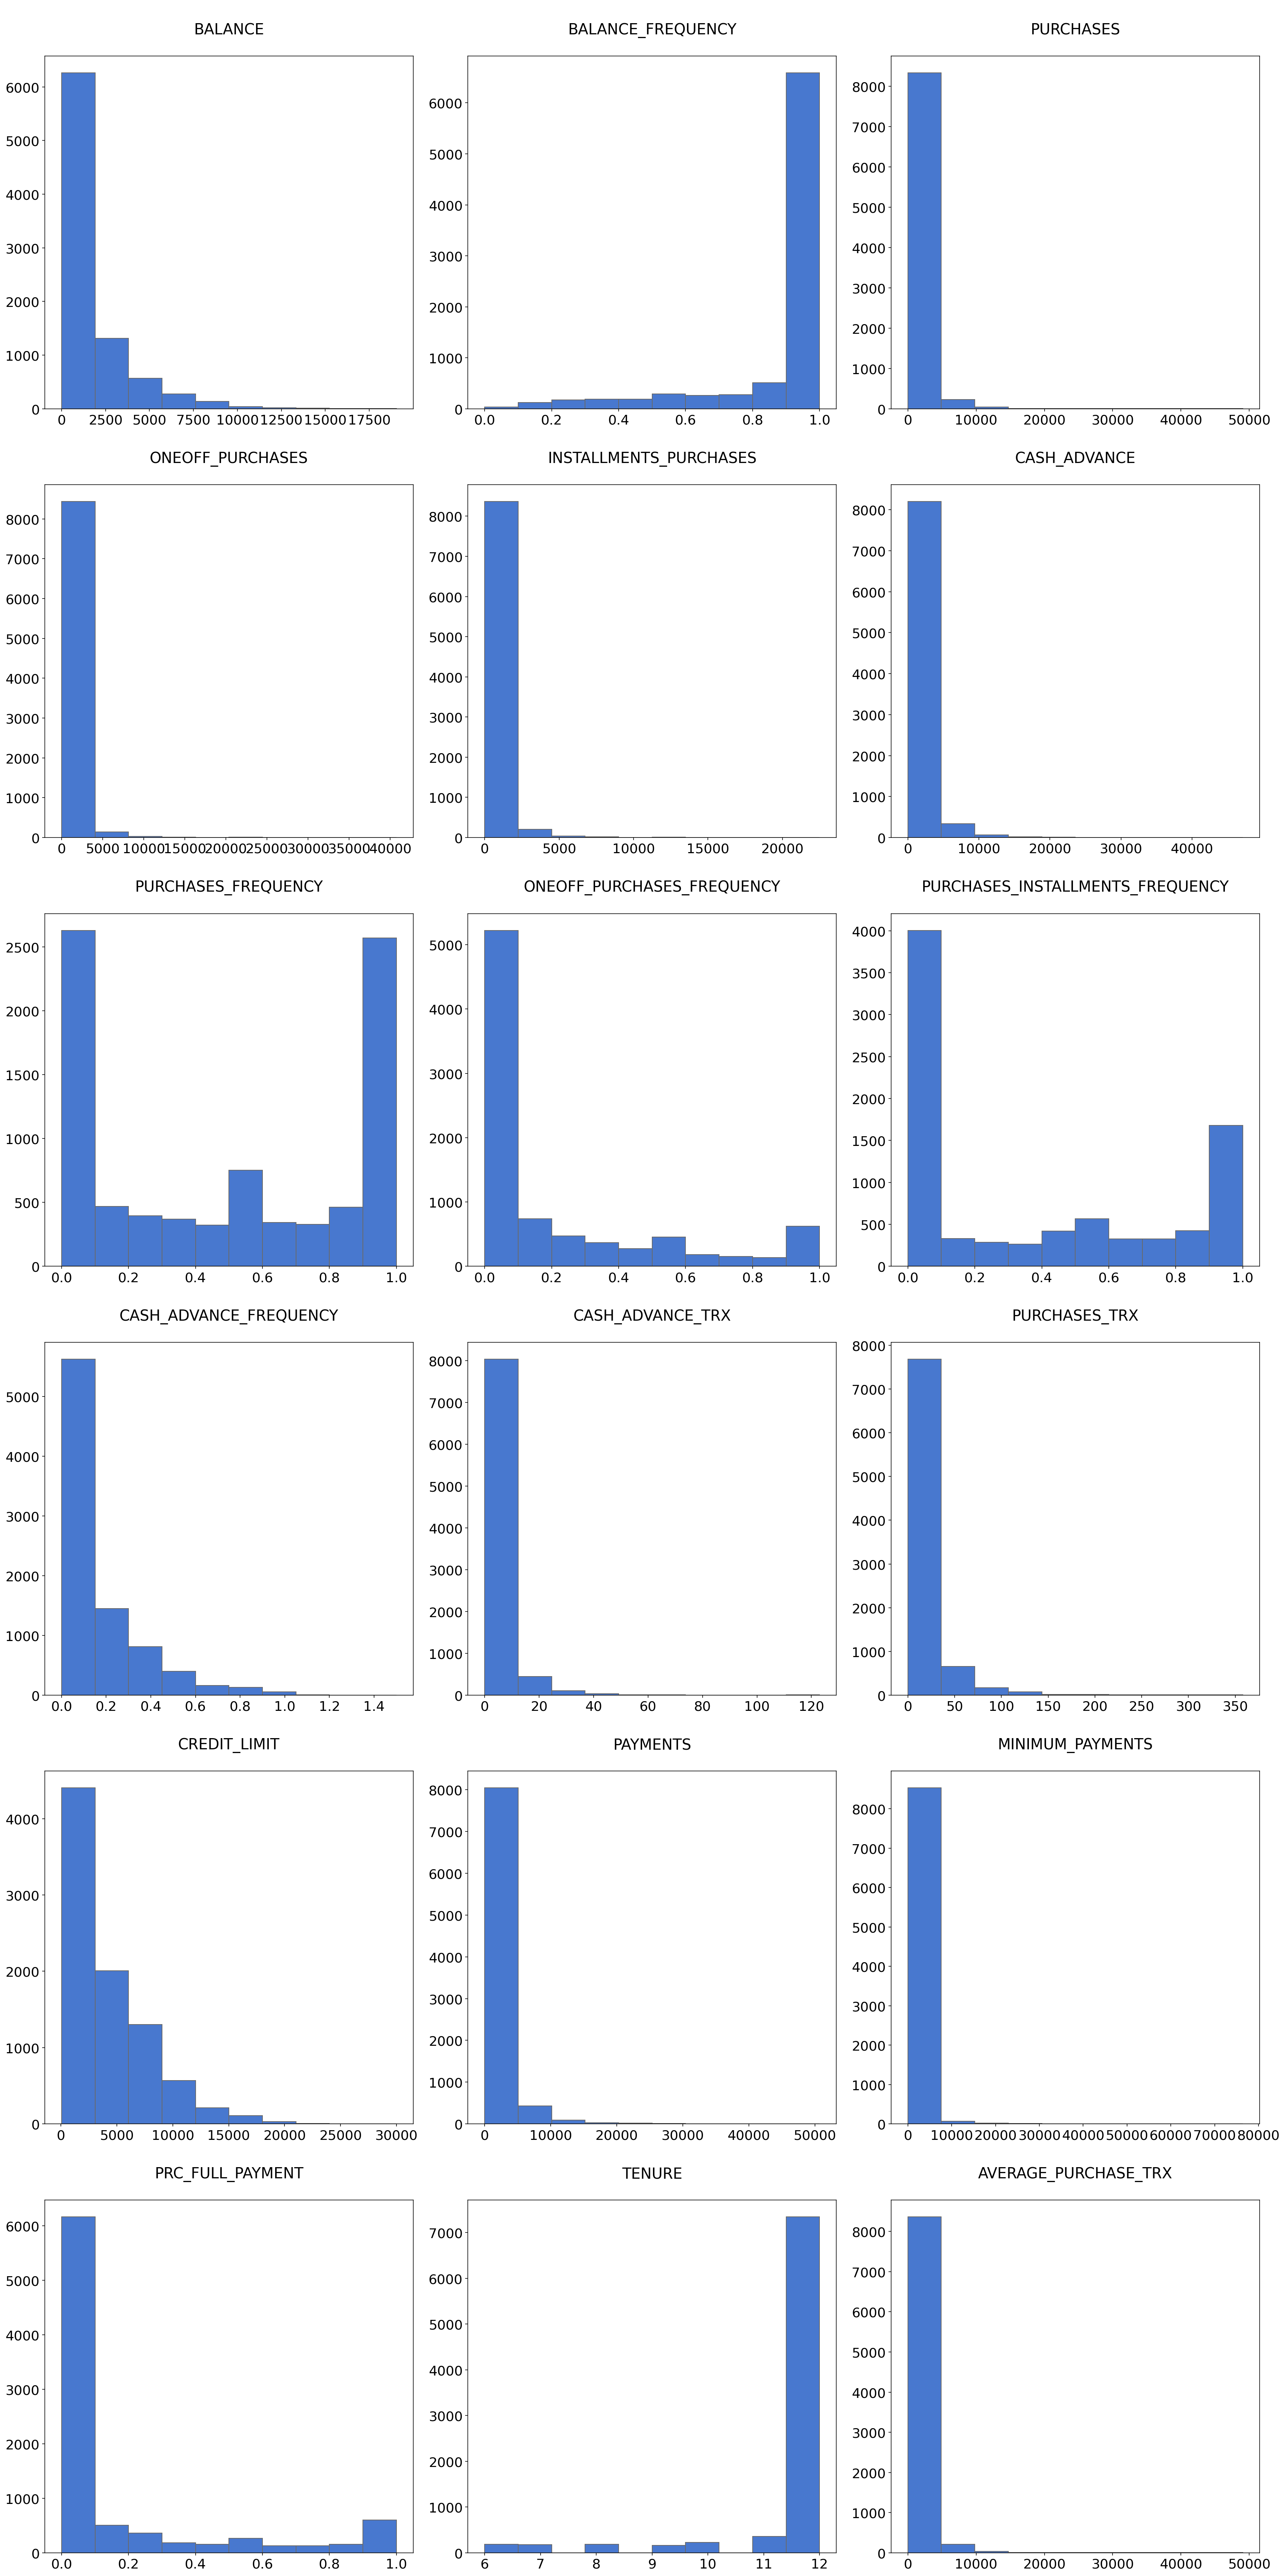

In [20]:
fig = visualize_data (df)
plt.show()

Data for almost all features is imbalanced

#### Shapiro-Wilk Test for normality on original data

In [21]:
from scipy.stats import shapiro

cols = []
for c in df.columns.values:
    cols.append(c)
    stat, p = shapiro(df[c].dropna())
    print(c, end = ': ')
    print('Statistics = %.3f, p = %.3f' % (stat, p))
    alpha = 0.05
    if p > alpha:
        print('Sample looks Gaussian (fail to reject H0)\n')
    else:
        print('Sample does not look Gaussian (reject H0)\n')

BALANCE: Statistics = 0.735, p = 0.000
Sample does not look Gaussian (reject H0)

BALANCE_FREQUENCY: Statistics = 0.578, p = 0.000
Sample does not look Gaussian (reject H0)

PURCHASES: Statistics = 0.440, p = 0.000
Sample does not look Gaussian (reject H0)

ONEOFF_PURCHASES: Statistics = 0.352, p = 0.000
Sample does not look Gaussian (reject H0)

INSTALLMENTS_PURCHASES: Statistics = 0.462, p = 0.000
Sample does not look Gaussian (reject H0)

CASH_ADVANCE: Statistics = 0.514, p = 0.000
Sample does not look Gaussian (reject H0)

PURCHASES_FREQUENCY: Statistics = 0.841, p = 0.000
Sample does not look Gaussian (reject H0)

ONEOFF_PURCHASES_FREQUENCY: Statistics = 0.715, p = 0.000
Sample does not look Gaussian (reject H0)

PURCHASES_INSTALLMENTS_FREQUENCY: Statistics = 0.793, p = 0.000
Sample does not look Gaussian (reject H0)

CASH_ADVANCE_FREQUENCY: Statistics = 0.727, p = 0.000
Sample does not look Gaussian (reject H0)

CASH_ADVANCE_TRX: Statistics = 0.510, p = 0.000
Sample does not look

#### Scale the original data

In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
scaler = StandardScaler()
scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(scaled, index = df.index, columns = df.columns)

waiting on plot


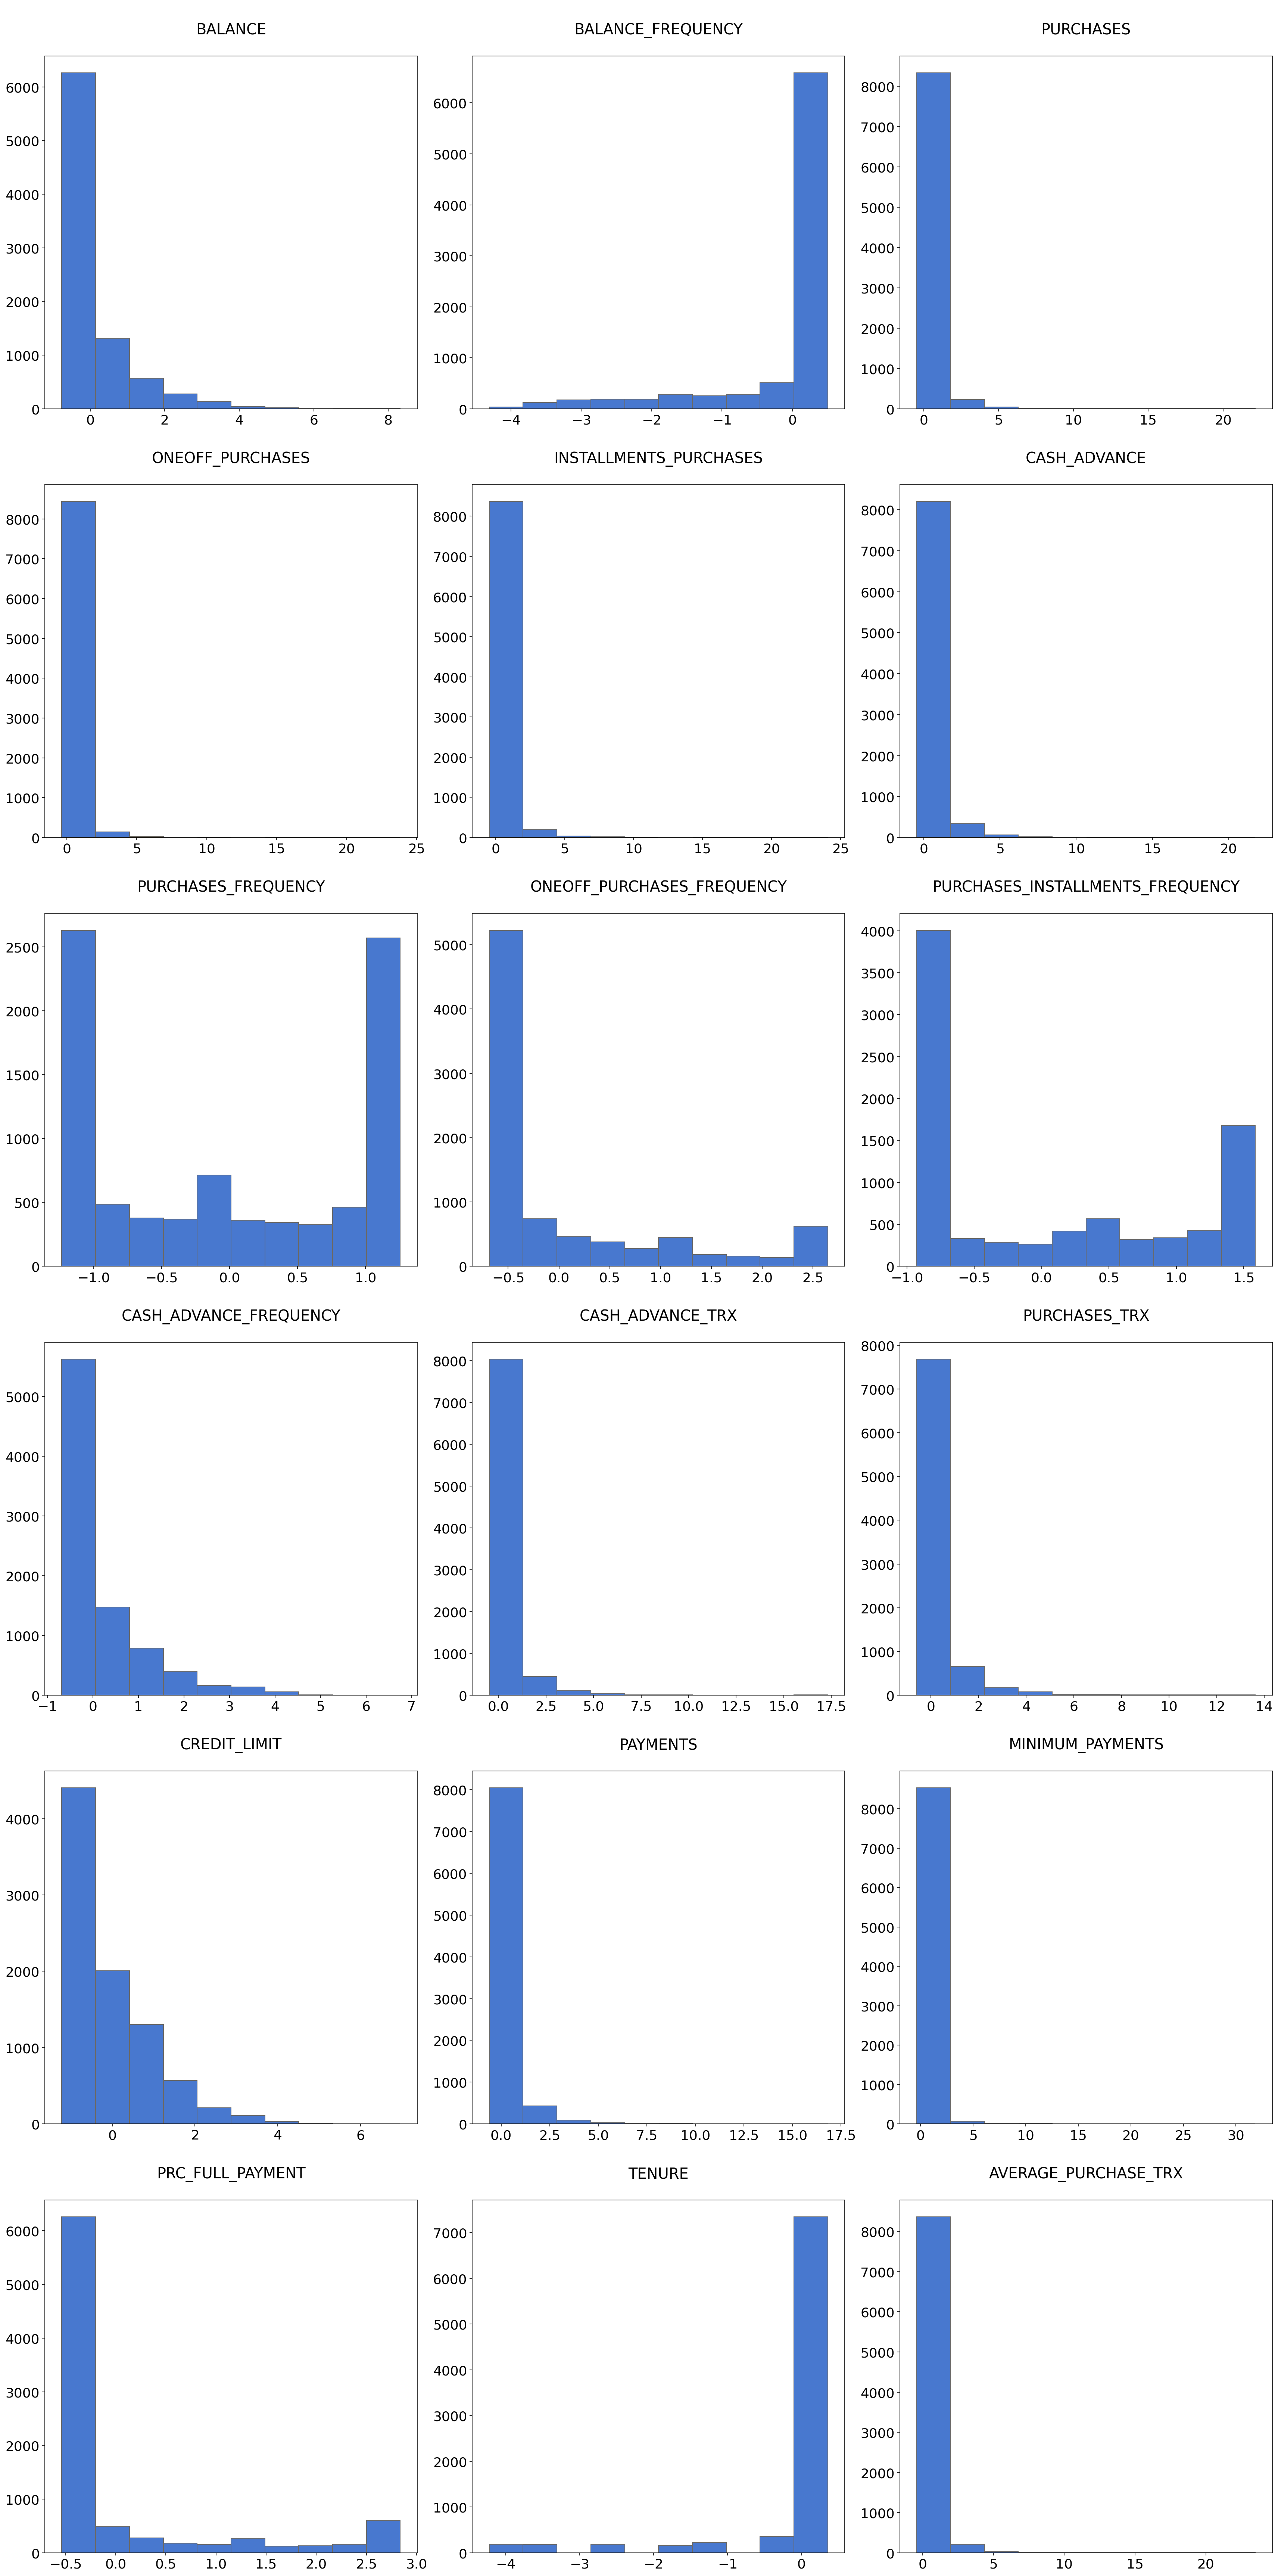

In [24]:
fig = visualize_data(df_scaled)

#### Unskew the data

In [25]:
df_log = df.copy()
for c in cols:
    df_log[c] = np.where (df_log[c] <= 0, 1, df_log[c])
df_log = df_log[cols].fillna(1).apply(np.log, axis = 1).round(3)

#### Scale the log data

In [26]:
log_scaled = scaler.fit_transform(df_log)
df_lscaled = pd.DataFrame(log_scaled, index = df_log.index, columns = df_log.columns)

In [27]:
df_lscaled.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,AVERAGE_PURCHASE_TRX
count,8.636000e+03,8.636000e+03,8.636000e+03,8.636000e+03,8.636000e+03,8.636000e+03,8.636000e+03,8.636000e+03,8.636000e+03,8.636000e+03,8.636000e+03,8.636000e+03,8.636000e+03,8.636000e+03,8.636000e+03,8.636000e+03,8.636000e+03,8.636000e+03
mean,-2.172108e-16,9.873220e-18,-4.607503e-17,6.911254e-17,1.234153e-17,5.101164e-17,-4.113842e-17,-2.797412e-17,4.113842e-18,-1.341112e-16,1.069599e-17,-4.607503e-17,-1.513894e-15,-1.448072e-16,7.635290e-16,6.129624e-17,-1.000486e-15,1.982872e-16
std,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00
min,-7.530166e+00,-6.228658e+00,-3.253605e+00,-2.404250e+00,-1.095500e+00,-9.376180e-01,-2.540766e+00,-1.980135e+00,-3.536331e+00,-1.917161e+00,-6.911967e-01,-1.251260e+00,-5.089714e+00,-8.407990e+00,-8.152051e+00,-2.670178e+00,-4.547030e+00,-3.910005e+00
25%,-6.351006e-01,1.724795e-01,-3.939725e-01,-9.914573e-01,-1.095500e+00,-9.376180e-01,-4.498956e-01,-7.754257e-01,-9.792748e-02,-7.102471e-01,-6.911967e-01,-1.251260e+00,-8.766332e-01,-6.636782e-01,-6.474483e-01,6.801633e-02,3.401568e-01,-1.010388e+00
50%,2.949007e-01,4.365299e-01,3.430885e-01,1.763590e-01,3.775654e-01,-9.376180e-01,5.734621e-01,7.438899e-01,5.715693e-01,8.118477e-01,-6.911967e-01,1.086965e-01,-1.132705e-01,-1.153912e-02,-1.407266e-01,5.273845e-01,3.401568e-01,3.013684e-01
75%,7.187182e-01,4.365299e-01,7.241679e-01,9.705753e-01,9.053478e-01,1.032008e+00,6.864471e-01,7.438899e-01,5.715693e-01,8.118477e-01,7.067553e-01,7.684084e-01,8.275618e-01,6.543022e-01,6.616860e-01,5.273845e-01,3.401568e-01,7.950217e-01
max,1.841758e+00,4.365299e-01,2.006726e+00,2.265175e+00,2.147736e+00,2.076374e+00,6.864471e-01,7.438899e-01,5.715693e-01,1.256616e+00,4.162299e+00,2.858661e+00,2.686131e+00,3.444413e+00,4.401598e+00,5.273845e-01,3.401568e-01,2.180655e+00


waiting on plot


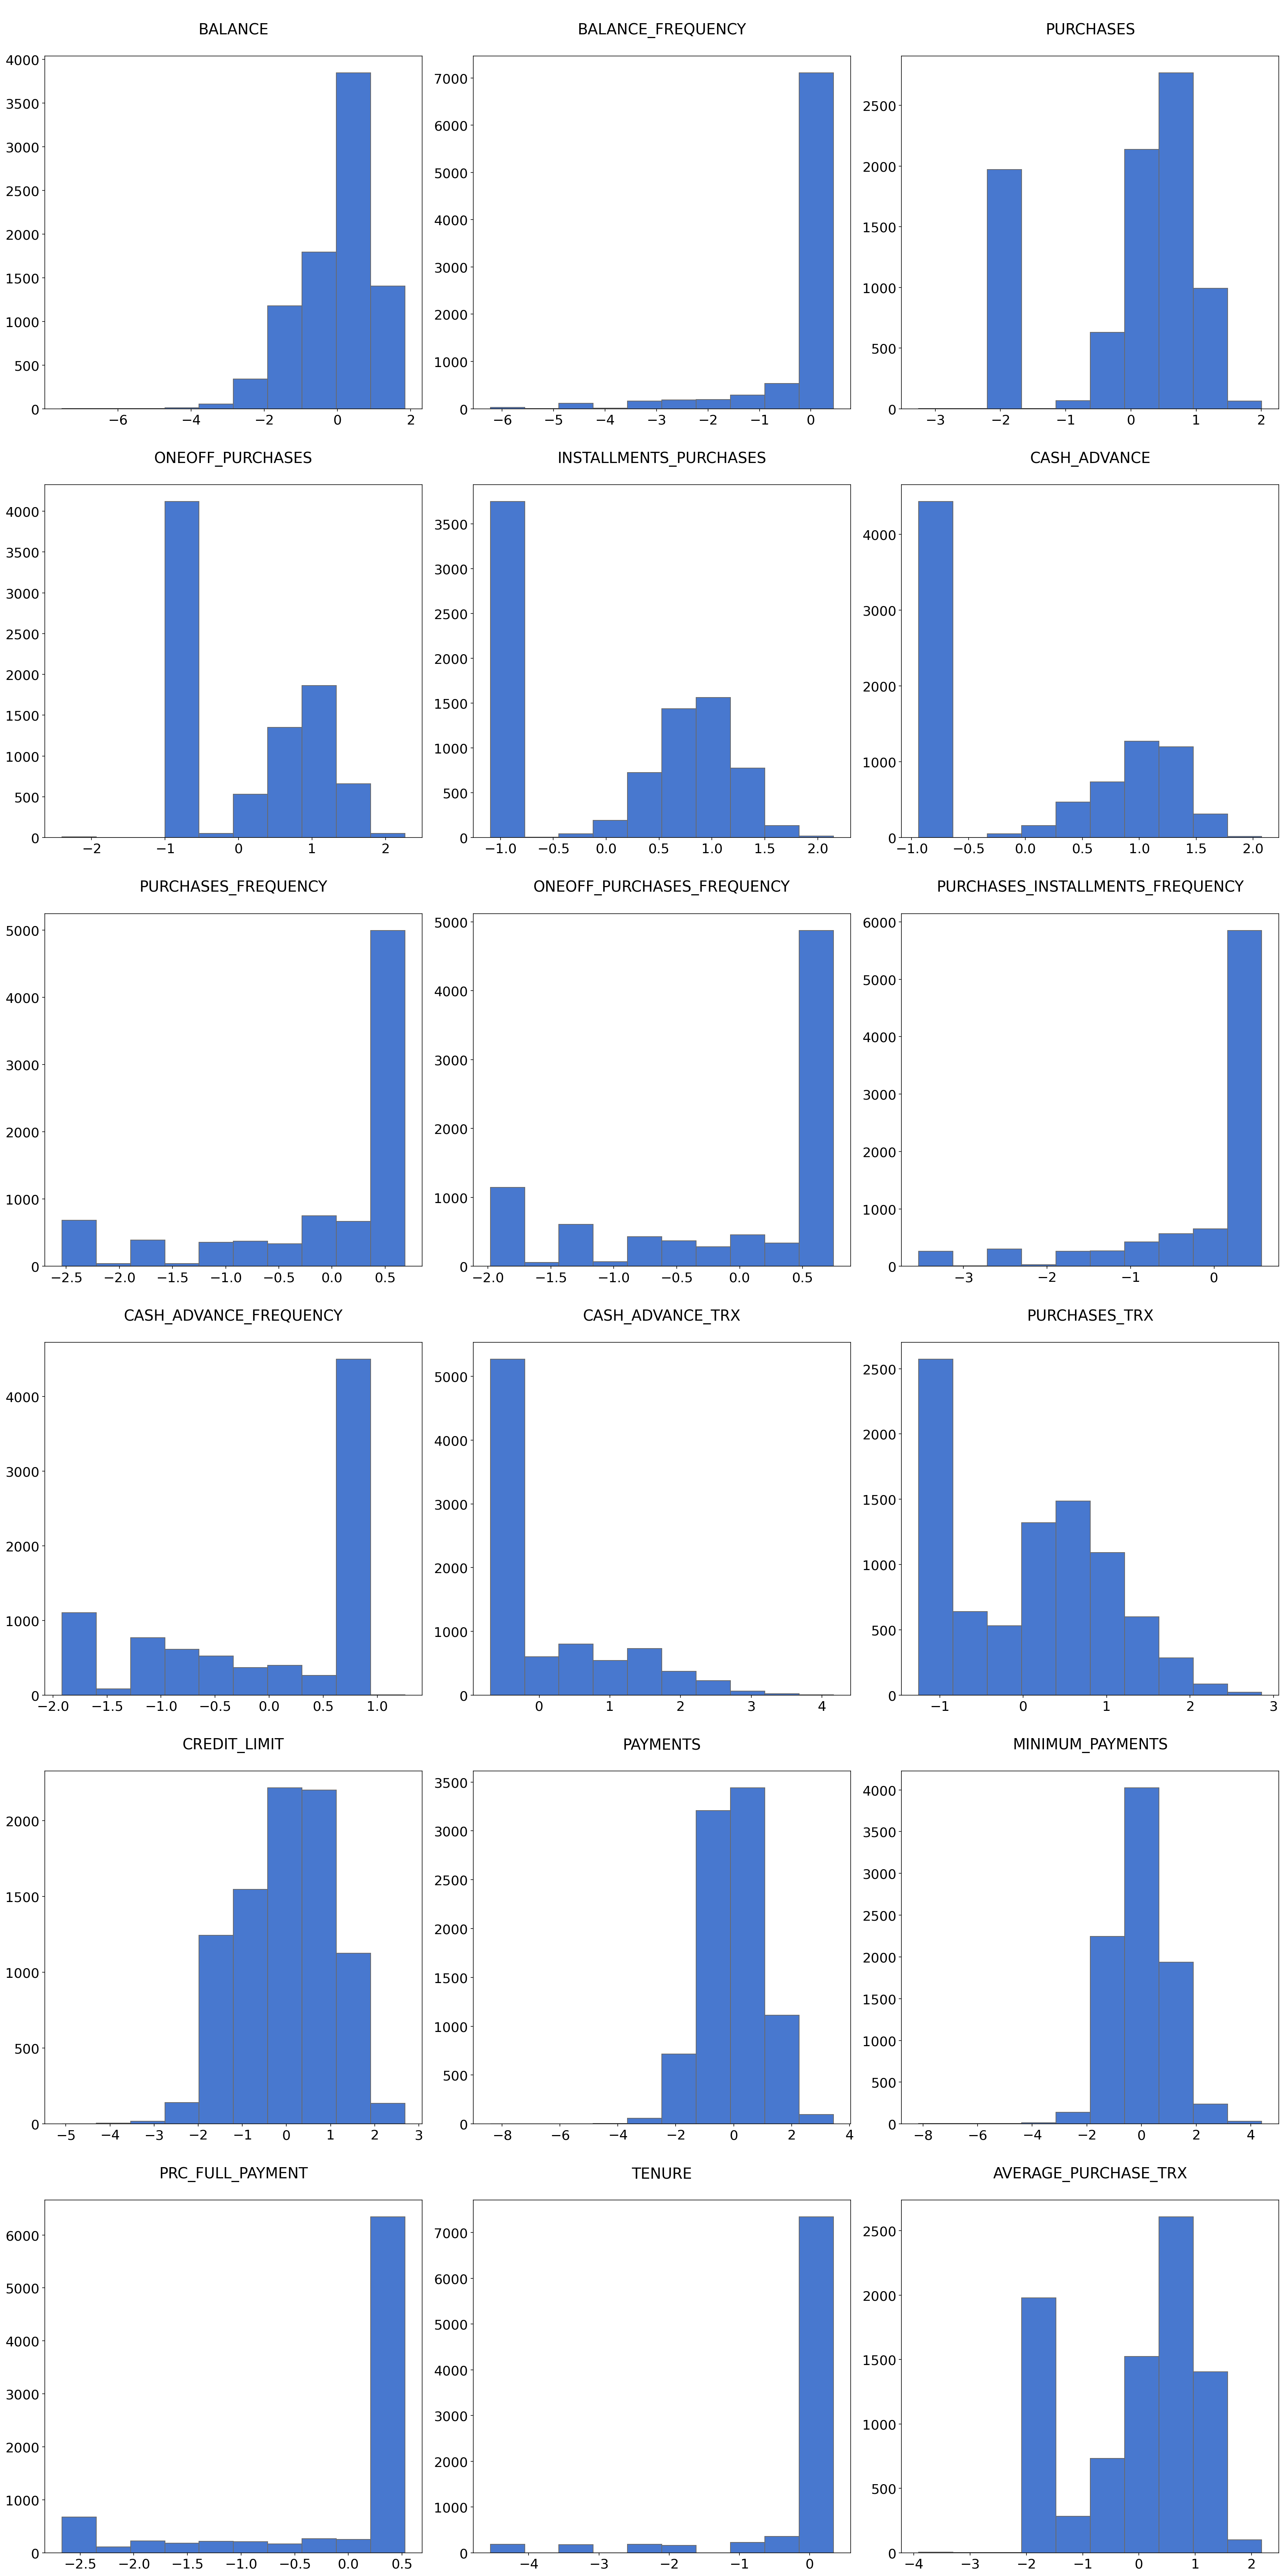

In [27]:
fig = visualize_data(df_lscaled)

# K-Means Clustering
Label is TENURE because I'm only interested in targeting new users, but it might also be helpful to know what differentiates a new user vs an old user. This way I can draw from either pool for future analysis.

In [28]:
from sklearn.cluster import KMeans

#### Determine k using the elbow method

          BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
CUST_ID                                                             
C10001  -1.291227          -0.122145  -0.124724         -0.991457   
C10002   0.932922           0.172480  -1.681140         -0.991457   
C10003   0.805420           0.436530   0.589629          1.048731   
C10005   0.236760           0.436530  -0.734246         -0.140714   
C10006   0.641707           0.436530   0.775730         -0.991457   
...           ...                ...        ...               ...   
C19184  -2.281154          -1.489648  -0.643074         -0.058800   
C19186  -1.475340           0.436530   0.256355         -0.991457   
C19188  -1.575812          -0.069335   0.016986         -0.991457   
C19189  -1.857847          -0.069335  -1.681140         -0.991457   
C19190  -0.164107          -0.689159   0.708119          1.155189   

         INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
CUST_ID                         

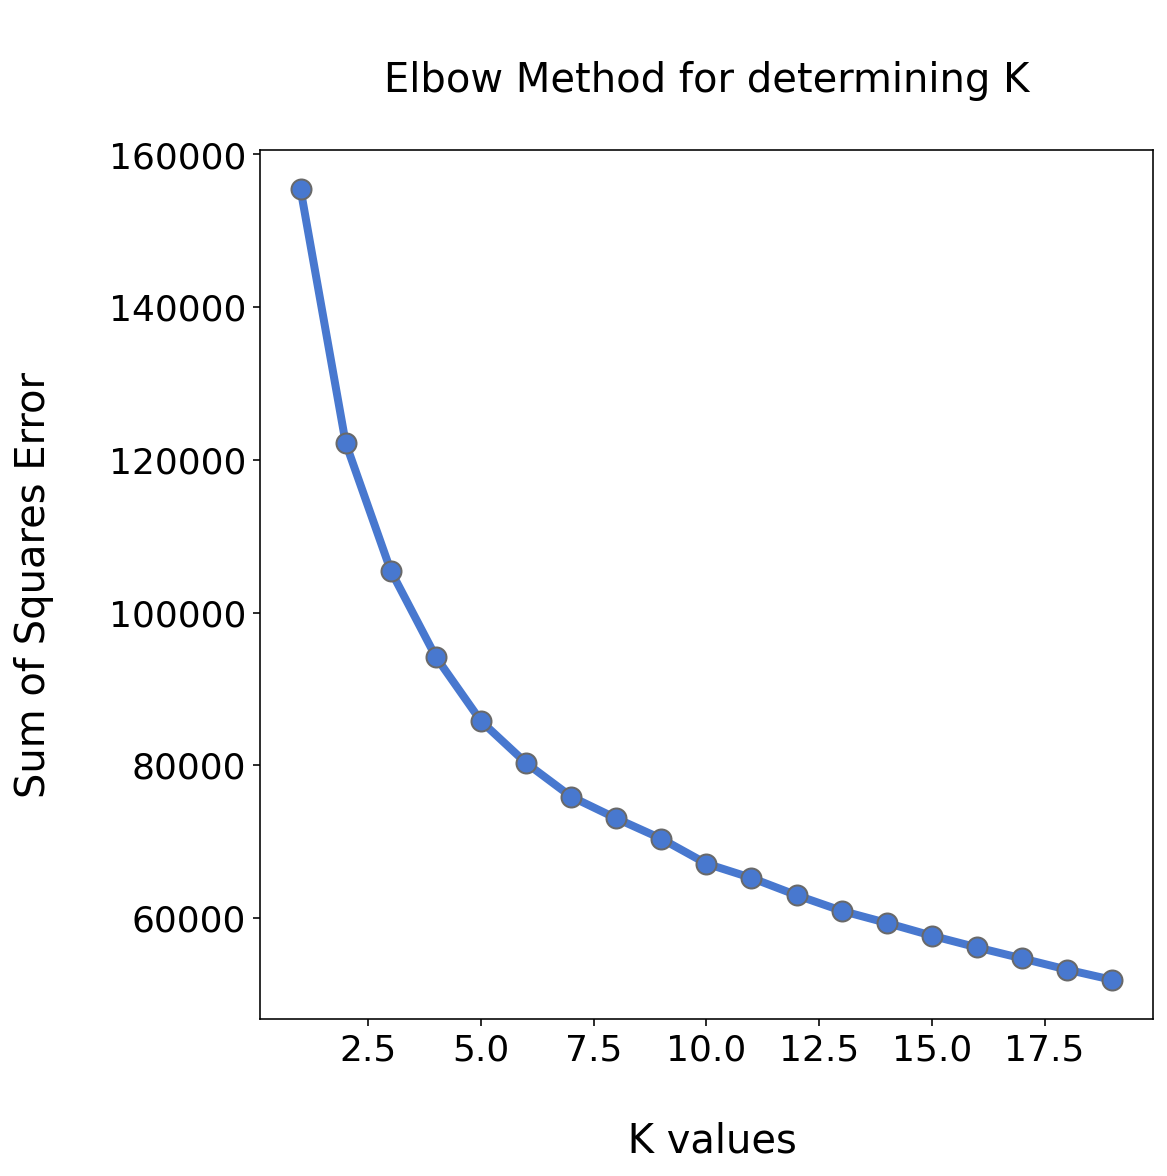

In [29]:
elbow(df_lscaled.dropna(), 1, 20)

k = 5 appears to be optimum

#### Run Kmeans for Tenure

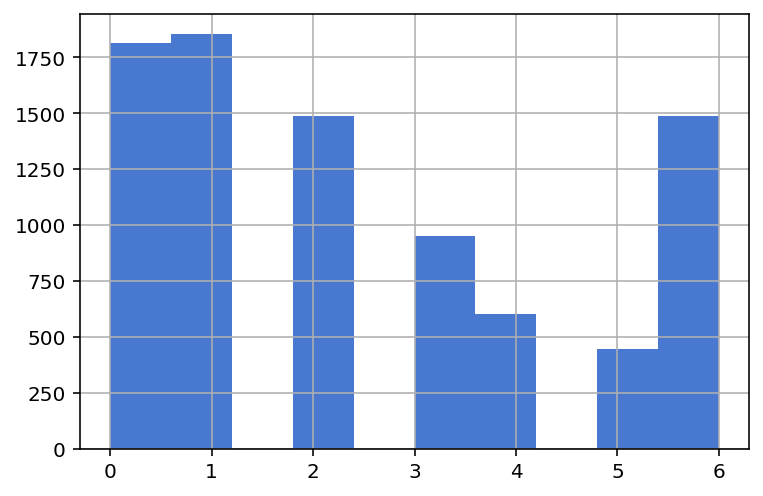

In [30]:
dfk = df_lscaled.copy()
model = KMeans (n_clusters = 7)
k_means = model.fit (dfk[cols])
dfk['cluster'] = k_means.predict(dfk[cols])
dfk['cluster'].hist()

In [31]:
dfk.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,AVERAGE_PURCHASE_TRX,cluster
CUST_ID,,,,,,,,,,,,,,,,,,,
C10001,-1.291227,-0.122145,-0.124724,-0.991457,0.379669,-0.937618,-1.640783,0.743890,-3.536331,0.811848,-0.691197,-0.766959,-1.447940,-1.288841,-0.806857,0.527384,0.340157,-0.554524,4
C10002,0.932922,0.172480,-1.681140,-0.991457,-1.095500,1.519005,0.686447,0.743890,0.571569,-0.710247,0.706755,-1.251260,0.917512,1.290598,0.878085,-1.407881,0.340157,-1.496211,2
C10003,0.805420,0.436530,0.589629,1.048731,-1.095500,-0.937618,0.686447,0.743890,0.571569,0.811848,-0.691197,0.485375,1.001385,-0.324549,0.434549,0.527384,0.340157,0.767786,0
C10005,0.236760,0.436530,-0.734246,-0.140714,-1.095500,-0.937618,-2.540766,-1.980135,0.571569,0.811848,-0.691197,-1.251260,-1.226710,-0.250043,-0.342672,0.527384,0.340157,-1.398161,3
C10006,0.641707,0.436530,0.775730,-0.991457,1.233118,-0.937618,0.160483,0.743890,-0.319440,0.811848,-0.691197,0.201643,-0.733199,0.369982,1.545455,0.527384,0.340157,0.815449,6


#### Assign cluster number to the original dataset

In [32]:
df['cluster'] = dfk.cluster.values

## RFM-type categorization by equal binning on K-Means Clusters

In [33]:
score_labels = ['0', '1','2'] 
dfs = pd.DataFrame(df.cluster)
for c in cols:
    try:
        dfs[c + '_score'] = pd.qcut(df_lscaled[c], q = 3, labels = score_labels, duplicates = 'drop').astype(int)
    except:
        continue
dfs.head()

,cluster,BALANCE_score,PURCHASES_score,ONEOFF_PURCHASES_score,CASH_ADVANCE_FREQUENCY_score,PURCHASES_TRX_score,CREDIT_LIMIT_score,PAYMENTS_score,MINIMUM_PAYMENTS_score,AVERAGE_PURCHASE_TRX_score
CUST_ID,,,,,,,,,,
C10001,4,0,0,0,1,0,0,0,0,0
C10002,2,2,0,0,0,0,2,2,2,0
C10003,0,2,1,2,1,1,2,1,2,2
C10005,3,1,0,1,1,0,0,1,1,0
C10006,6,2,2,0,1,1,0,1,2,2


#### Assign meaningful values to the clusters

In [34]:
dfg = dfs.groupby('cluster').mean()
dfg

,BALANCE_score,PURCHASES_score,ONEOFF_PURCHASES_score,CASH_ADVANCE_FREQUENCY_score,PURCHASES_TRX_score,CREDIT_LIMIT_score,PAYMENTS_score,MINIMUM_PAYMENTS_score,AVERAGE_PURCHASE_TRX_score
cluster,,,,,,,,,
0,0.964401,1.796117,1.764293,0.999461,1.767530,1.364617,1.420173,0.945523,1.799353
1,0.767338,0.738255,0.581655,0.592841,0.706935,0.431767,0.331096,0.568233,0.818792
2,1.413068,0.000000,0.001661,0.251384,0.002215,0.944075,0.985604,1.346622,0.001107
3,1.215707,0.740314,1.295288,0.580105,0.365445,0.877487,0.818848,1.195812,0.469110
4,0.004910,0.638298,0.707038,0.900164,0.569558,0.891980,0.513912,0.073650,0.546645
5,1.563981,1.538930,1.337170,0.285714,1.589032,1.262018,1.500339,1.559242,1.563304
6,0.320323,1.079408,0.141319,0.975101,1.271871,0.612382,0.512113,0.470390,1.237550


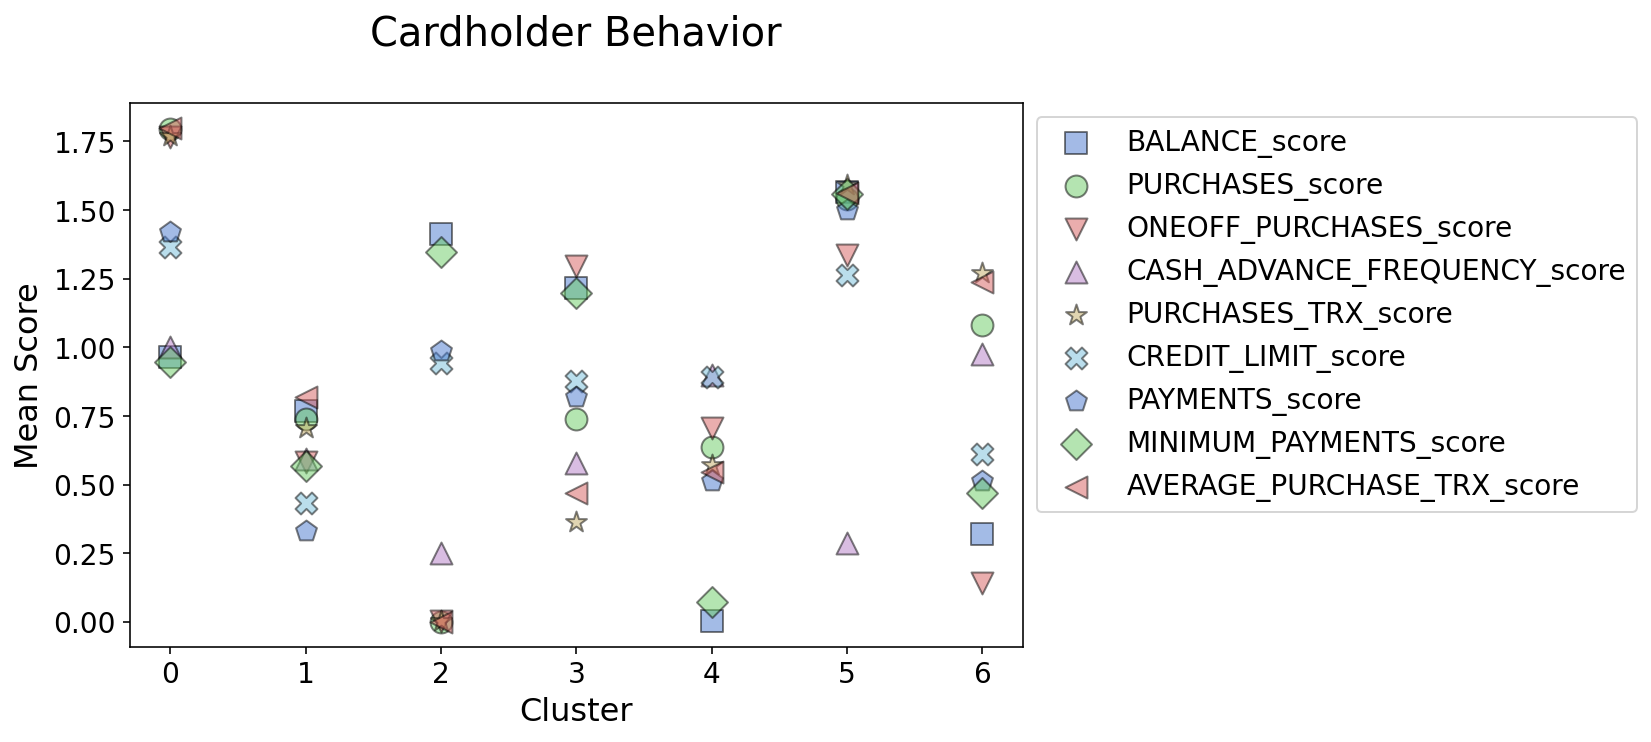

In [35]:
fig, ax = plt.subplots (1,1, figsize = (8,5))
markers = ['s', 'o', 'v', '^','*', 'X', 'p','D','<', '>', 's', 'o']
for i, c in enumerate(dfg.columns.values):
    ax.scatter (dfg.index, dfg[c], s = 120, ec = 'k', alpha = 0.5, label = c, cmap = 'rainbow', marker = markers[i])
ax.set_xlabel('Cluster', fontsize = 16)
ax.set_ylabel('Mean Score', fontsize = 16)
ax.tick_params(labelsize = 14)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, fontsize = 14, bbox_to_anchor = (1,1))
fig = ax.set_title('Cardholder Behavior\n', fontsize = 20)

0 - moderate balance, large # purchases per transaction, moderate payments

1 - Average user

2 - High Balance, one-off purchases, many minimum payments

3 - High Balance, high one-off puchases, few purchases per transaction, occasional cash advance

4 - Low balance moderate user

5 - High balance, frequent buyer, only outstanding is that they don't make cash advances

6 - Low balance but many low value purchases per transaction

# Agglomerative hierarchical clustering

#### Dendrogram

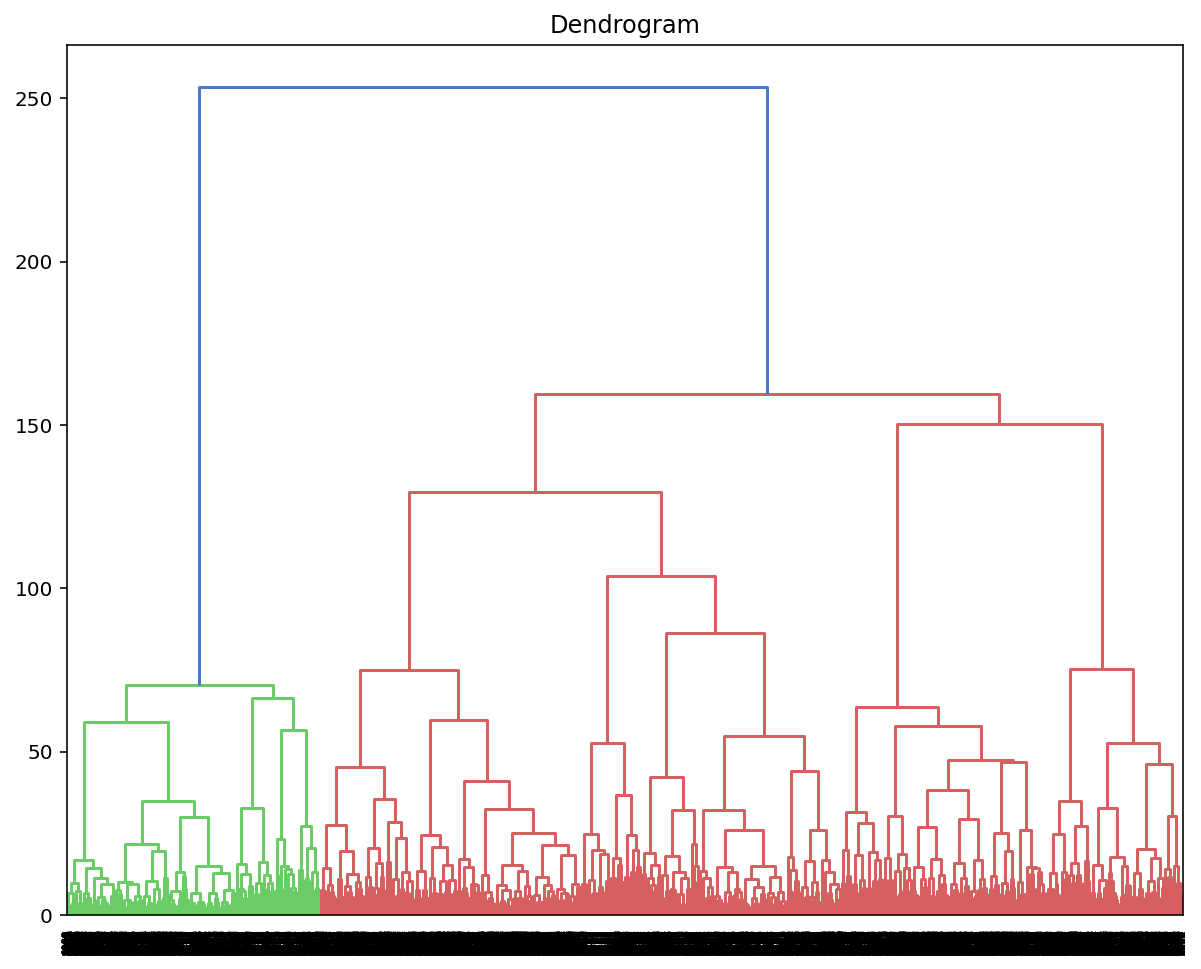

In [36]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize = (10,8))
plt.title ("Dendrogram")
dend = shc.dendrogram(shc.linkage(df_lscaled, method = 'ward'))
plt.axhline(y=1155, color='dimgray', linestyle=':')

#### Agglomerative clustering

In [37]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=7, affinity='euclidean', linkage='ward')  
df['cluster'] = model.fit_predict(df_lscaled)

#### Visualize the clusters for each feature (box plots?)

waiting on plot


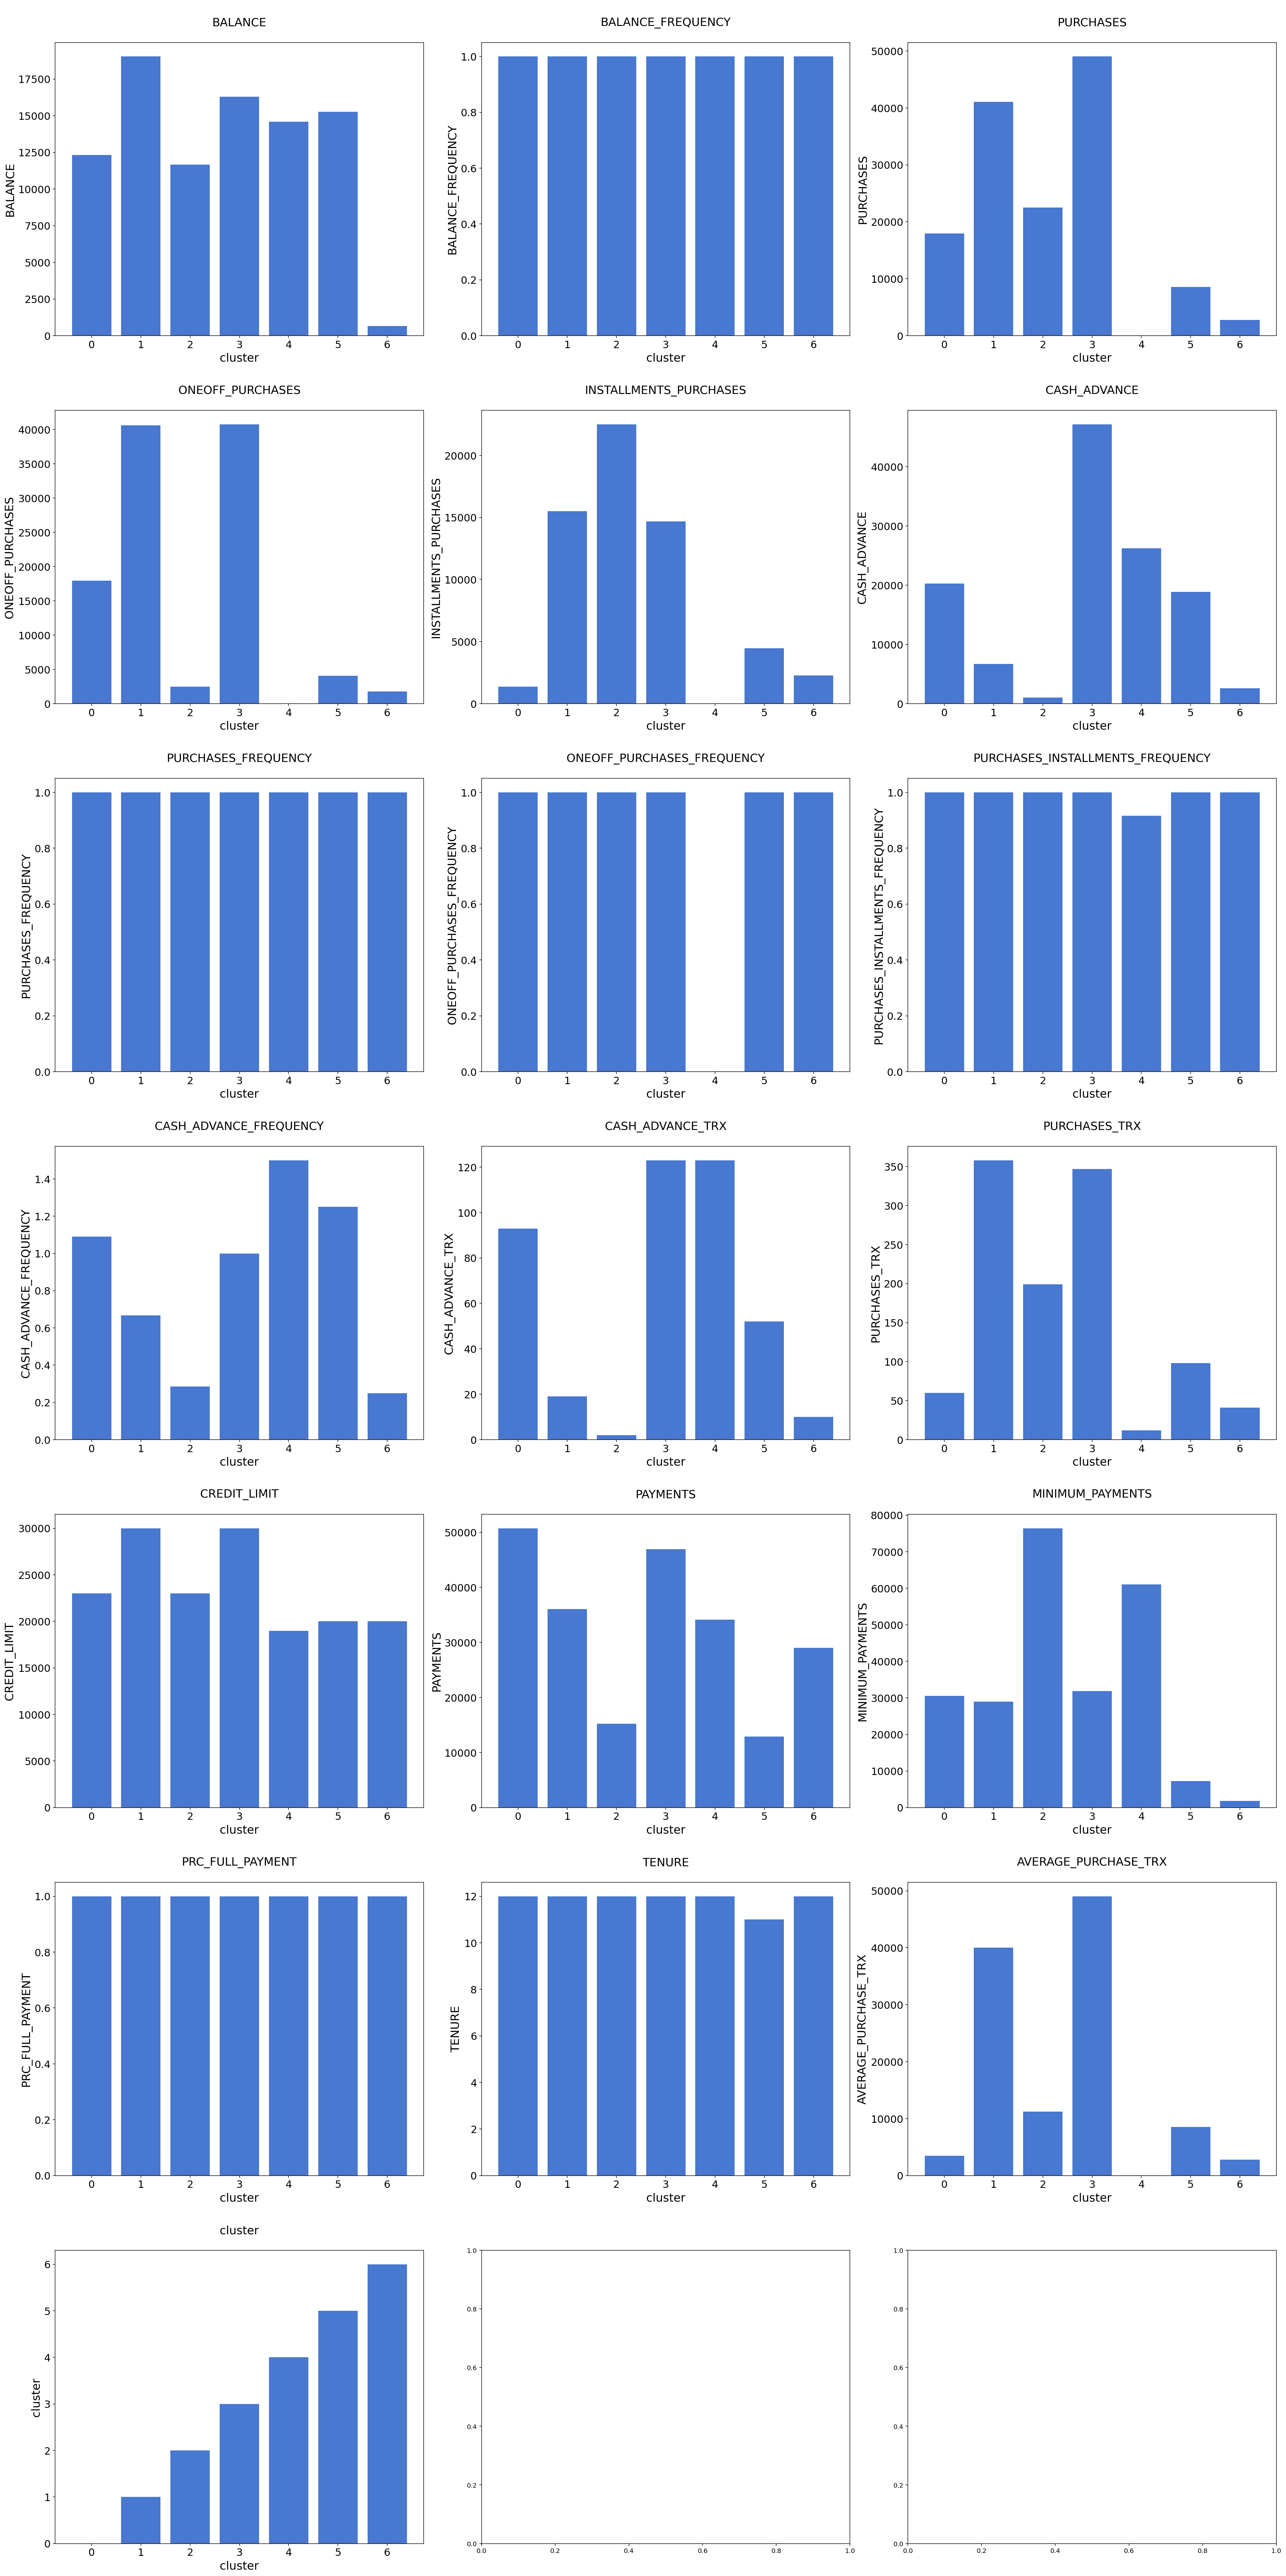

In [38]:
fig = visualize_bar (df, 'cluster')

## RFM-type categorization by equal binning on hierarchical clusters

In [39]:
score_labels = ['0', '1','2'] 
dfs = pd.DataFrame(df.cluster)
for c in cols:
    try:
        dfs[c + '_score'] = pd.qcut(df_lscaled[c], q = 3, labels = score_labels, duplicates = 'drop').astype(int)
    except:
        continue
dfs.head()

,cluster,BALANCE_score,PURCHASES_score,ONEOFF_PURCHASES_score,CASH_ADVANCE_FREQUENCY_score,PURCHASES_TRX_score,CREDIT_LIMIT_score,PAYMENTS_score,MINIMUM_PAYMENTS_score,AVERAGE_PURCHASE_TRX_score
CUST_ID,,,,,,,,,,
C10001,2,0,0,0,1,0,0,0,0,0
C10002,4,2,0,0,0,0,2,2,2,0
C10003,1,2,1,2,1,1,2,1,2,2
C10005,0,1,0,1,1,0,0,1,1,0
C10006,2,2,2,0,1,1,0,1,2,2


#### Assign meaningful values to the clusters

In [40]:
dfg = dfs.groupby('cluster').mean()
dfg

,BALANCE_score,PURCHASES_score,ONEOFF_PURCHASES_score,CASH_ADVANCE_FREQUENCY_score,PURCHASES_TRX_score,CREDIT_LIMIT_score,PAYMENTS_score,MINIMUM_PAYMENTS_score,AVERAGE_PURCHASE_TRX_score
cluster,,,,,,,,,
0,0.887297,0.806113,1.375358,0.691500,0.361987,1.003820,0.866285,0.901624,0.500478
1,0.880435,1.686265,1.741107,0.989625,1.703063,1.251482,1.273715,0.875988,1.696640
2,0.474545,1.129091,0.012727,0.993636,1.288182,0.686364,0.632727,0.625455,1.279091
3,1.512869,1.451350,1.244193,0.274325,1.516008,1.195229,1.409918,1.524796,1.482737
4,1.362525,0.000000,0.000000,0.253055,0.000509,0.904277,0.941955,1.275458,0.000000
5,0.656780,1.150424,0.864407,0.766949,1.040254,0.468220,0.459746,0.559322,1.209746
6,0.009174,0.642202,0.045872,0.988532,0.873853,0.791284,0.321101,0.057339,0.770642


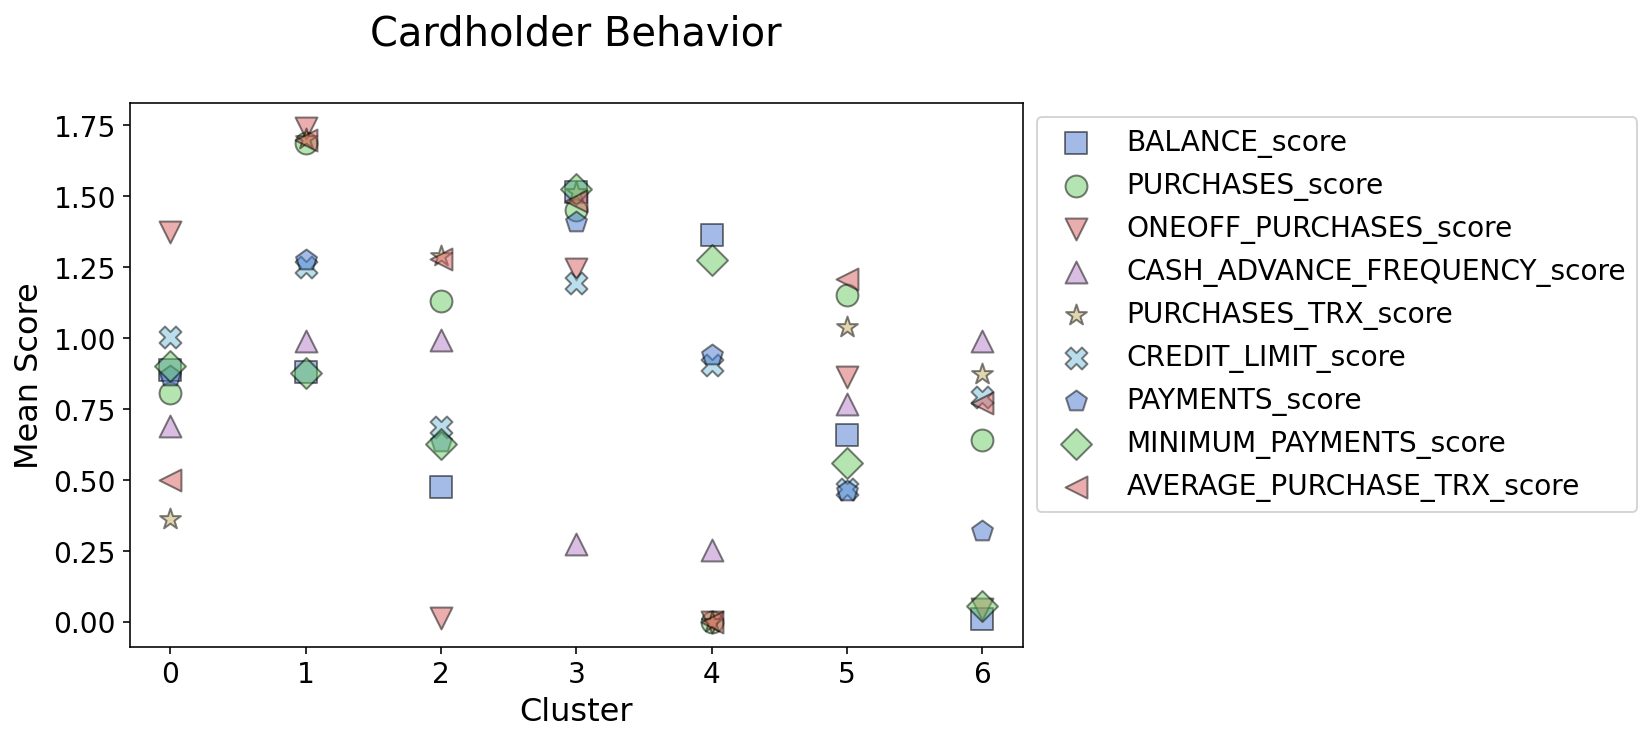

In [41]:
fig, ax = plt.subplots (1,1, figsize = (8,5))
markers = ['s', 'o', 'v', '^','*', 'X', 'p','D','<', '>', 's', 'o']
for i, c in enumerate(dfg.columns.values):
    ax.scatter (dfg.index, dfg[c], s = 120, ec = 'k', alpha = 0.5, label = c, cmap = 'rainbow', marker = markers[i])
ax.set_xlabel('Cluster', fontsize = 16)
ax.set_ylabel('Mean Score', fontsize = 16)
ax.tick_params(labelsize = 14)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, fontsize = 14, bbox_to_anchor = (1,1))
fig = ax.set_title('Cardholder Behavior\n', fontsize = 20)

Clusters started to look alike after 6

# Cluster identities

**Cluster 0 - Average single-purchase user**
- Many one-off purchases 
- High credit limit
- Multiple minimum payments
- Does not take out cash advances often
- Average purchase value 
- Carries an average daily balance

**Cluster 1 - Responsible high-volume user** 
- Mostly one-off and multiple purchases with high value
- Carries a high balance and has a high credit limit
- Responsible for multiple minimum payments but is good at paying them off monthly
- Occasionally takes out cash advances 

**Cluster 2 - Responsible everyday user**
- Makes moderate-to high value purchases with multiple purchases per transaction
- Occasionally takes out cash advances
- Has an average credit limit with few minimum payments
- Carries a relatively low balance but is not always good at paying the full amount each month

**Cluster 3 - High volume user that does not use cash advances**
- High frequency user that makes high-value purchases frequently, both as single and multiple purchases per transaction
- Maintains a high balance but with many minimum payments
- Average credit limit 
- Does not always pay the full balance 

**Cluster 4 - Inactive user**
- Carries a high balance with multiple minimum payments 
- Not likely to take out cash advances
- Makes few purchases of any value or type
- Not likely to pay the full balance each month

**Cluster 5 - All around multiple-purchase user**
- Only different from the average single-purchase user in that they tend to make multiple purchases per transaction

**Cluster 6 - Cash advancer**
- More likely to make cash advances than purchases
- Carries a very low balance, if any
- Makes small-to-moderate value purchases with multiple purchases per transaction
- Is not likely to pay the balance in full each month